In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import locale
import tabulate


locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

# Paleta de colores para el proyecto.
paleta = ['#355070', '#6d597a', '#b56576', '#e56b6f', '#eaac8b']

# Ventas de supermecado (Supermarket sales).

Este conjunto de datos lo encontré en [Kaggle](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?select=supermarket_sales+-+Sheet1.csv). El dataset trata de las ventas en 3 sucursales de una empresa de supermercados en el plazo de 3 meses (Enero de 2019 a marzo de 2019).

### Objetivo.

Realizar un Análisis Exploratorio de Datos (EDA) y un análisis de datos general para brindar información importante a la empresa sobre las 3 sucursales en los meses de enero a marzo.

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Variables del dataset.

**Invoice ID**: Número de identificación de factura del comprobante de venta generado por computadora.  

**Branch**: Sucursal del supercentro (hay 3 sucursales disponibles identificadas por A, B y C).  

**City**: Ubicación de los supercentros.  

**Customer type**: Tipo de clientes, registrado por Socios para clientes con tarjeta de socio y Normal para sin tarjeta de socio.  

**Gender**: Tipo de género del cliente.  

**Product line**: Grupos generales de categorización de artículos - Accesorios electrónicos, Accesorios de moda, Alimentos y bebidas, Salud y belleza, Hogar y estilo de vida, Deportes y viajes.  

**Unit price**: Precio de cada producto en $.  

**Quantity**: Número de productos adquiridos por cliente.  

**Tax 5%**: 5% de impuesto por compra del cliente.  

**Total**: Precio total incluyendo impuestos.  

**Date**: Fecha de compra (Registro disponible desde enero de 2019 a marzo de 2019).  

**Time**: Hora de compra (10 am a 9 pm).  

**Payment**: Pago utilizado por el cliente para la compra (Hay 3 métodos disponibles: efectivo, tarjeta de crédito y billetera electrónica).  

**COGS**: Costo de los bienes vendidos.  

**Gross margin percentage**: Porcentaje de margen bruto.  

**Gross income**: Ingreso bruto.  

**Rating**: Calificación de estratificación del cliente en su experiencia de compra general (en una escala del 1 al 10).  

## Renombrar las columnas

Dado que este proyecto es en español, voy a realizar un cambio de nombre a las columnas al idioma español. De esta manera, al realizar los gráficos, los ejes serán más comprensibles.

In [3]:
df = df.rename(columns = {
    'Invoice ID' : 'ID de factura',
    'Branch' : 'Sucursal',
    'City' : 'Ciudad',
    'Customer type' : 'Tipo de cliente',
    'Gender' : 'Genero',
    'Product line' : 'Linea de productos',
    'Unit price' : 'Precio unitario',
    'Quantity' : 'Cantidad',
    'Tax 5%' : 'Impuesto',
    'Date' : 'Fecha',
    'Time' : 'Hora',
    'Payment' : 'Pago',
    'gross margin percentage' : 'Porcentaje de margen bruto',
    'gross income' : 'Ingreso bruto'
})

Primero vamos a conocer un poco más sobre nuestros datos realizando un Análisis Exploratorio de Datos (**EDA**), para ver si estos poseen alguna anomalía, patrones y saber la características de los datos.

In [4]:
print('Cantidad de columnas:', df.shape[1])
print('Cantidad de filas:', df.shape[0])

Cantidad de columnas: 17
Cantidad de filas: 1000


In [5]:
df.dtypes

ID de factura                  object
Sucursal                       object
Ciudad                         object
Tipo de cliente                object
Genero                         object
Linea de productos             object
Precio unitario               float64
Cantidad                        int64
Impuesto                      float64
Total                         float64
Fecha                          object
Hora                           object
Pago                           object
cogs                          float64
Porcentaje de margen bruto    float64
Ingreso bruto                 float64
Rating                        float64
dtype: object

In [6]:
df.describe()

,Precio unitario,Cantidad,Impuesto,Total,cogs,Porcentaje de margen bruto,Ingreso bruto,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID de factura               1000 non-null   object 
 1   Sucursal                    1000 non-null   object 
 2   Ciudad                      1000 non-null   object 
 3   Tipo de cliente             1000 non-null   object 
 4   Genero                      1000 non-null   object 
 5   Linea de productos          1000 non-null   object 
 6   Precio unitario             1000 non-null   float64
 7   Cantidad                    1000 non-null   int64  
 8   Impuesto                    1000 non-null   float64
 9   Total                       1000 non-null   float64
 10  Fecha                       1000 non-null   object 
 11  Hora                        1000 non-null   object 
 12  Pago                        1000 non-null   object 
 13  cogs                        1000 n

In [8]:
df.isnull().sum()

ID de factura                 0
Sucursal                      0
Ciudad                        0
Tipo de cliente               0
Genero                        0
Linea de productos            0
Precio unitario               0
Cantidad                      0
Impuesto                      0
Total                         0
Fecha                         0
Hora                          0
Pago                          0
cogs                          0
Porcentaje de margen bruto    0
Ingreso bruto                 0
Rating                        0
dtype: int64

outliers

<function matplotlib.pyplot.show(close=None, block=None)>

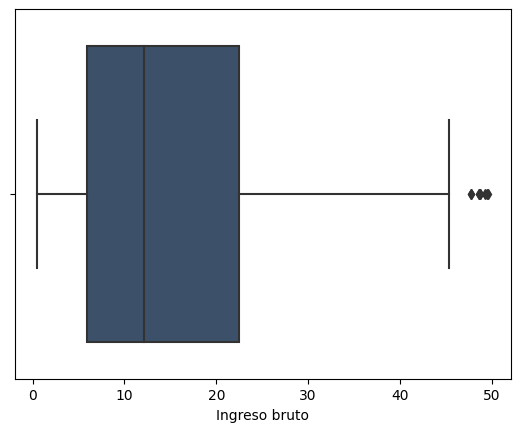

In [9]:
sns.set_palette(paleta)
sns.boxplot(x = df['Ingreso bruto'])
plt.show

In [10]:
df.head(2)

,ID de factura,Sucursal,Ciudad,Tipo de cliente,Genero,Linea de productos,Precio unitario,Cantidad,Impuesto,Total,Fecha,Hora,Pago,cogs,Porcentaje de margen bruto,Ingreso bruto,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


### Correlación.

Vamos a ver que tan relacionadas están las variables numéricas de nuestro dataset.

C:\Users\rodri\AppData\Local\Temp\ipykernel_7640\3951173893.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.corr()


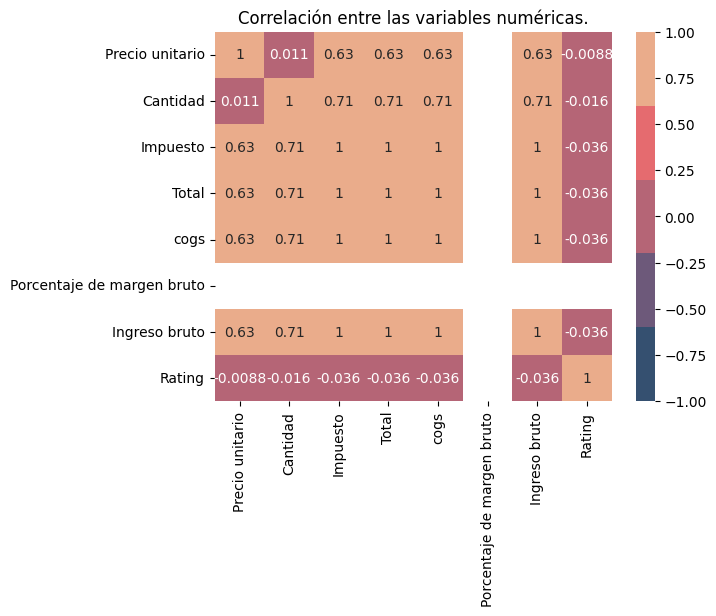

In [11]:
correlacion = df.corr()

sns.heatmap(correlacion, annot = True, cmap = paleta, vmin = -1, vmax = 1)
plt.title('Correlación entre las variables numéricas.')
plt.show()

Vemos que la cantidad difiere su relación con el precio unitario, esto nos puede decir que la gente suele llevar productos a por mayor. Luego de eso, todas las variables tienen una muy fuerte correlación a excepción del "Rating".

### Sucursal con más ingresos brutos.

Vayamos al caso hipotético en el que la empresa esté en crisis económica y esta decida cerrar una de sus sucursales según sus ventas durante estos 3 meses.

In [12]:
sucursal_ciudad = df[['Ciudad', 'Sucursal']].drop_duplicates()

sucursal_ciudad

,Ciudad,Sucursal
0,Yangon,A
1,Naypyitaw,C
9,Mandalay,B


**Sucursal A** - Yangon: La población de Yangon en 2019 era de aproximadamente 5.244.000 personas.

**Sucursal B** - Mandalay: La población de Mandalay en 2019 era de aproximadamente 1.406.000 personas.

**Sucursal C** - Naypyitaw: La población de Naypyitaw en 2019 era de aproximadamente 546.000 personas.

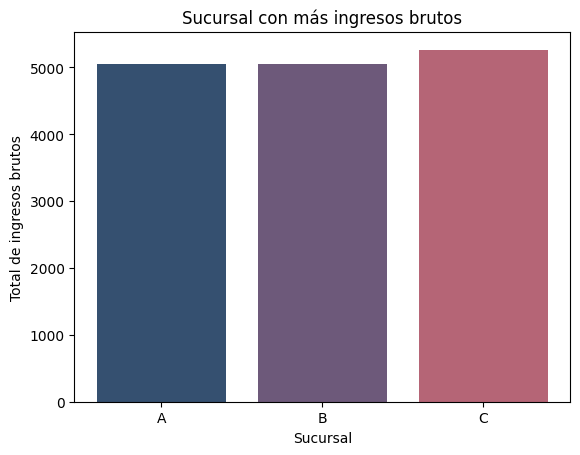

In [13]:
ingreso_bruto_sucursal = df.groupby('Sucursal')['Ingreso bruto'].sum().reset_index()

plt.bar(ingreso_bruto_sucursal['Sucursal'], ingreso_bruto_sucursal['Ingreso bruto'], color = paleta)

plt.title('Sucursal con más ingresos brutos')
plt.xlabel('Sucursal')
plt.ylabel('Total de ingresos brutos')
plt.show()

La sucursal con más ventas es la sucursal **"C"**. Este puede ser uno de los pocos supermercados en la ciudad y estar en un punto estratégico muy bueno, dado que es la sucursal ubicada en la ciudad con menos habitantes y aún así es la que más ventas tuvo durante los 3 meses.

### Rating promedio.

Ahora sabemos que la sucursal con más ingresos brutos es la sucursal **"C"** pero, ¿Tiene el mejor promedio de Rating?

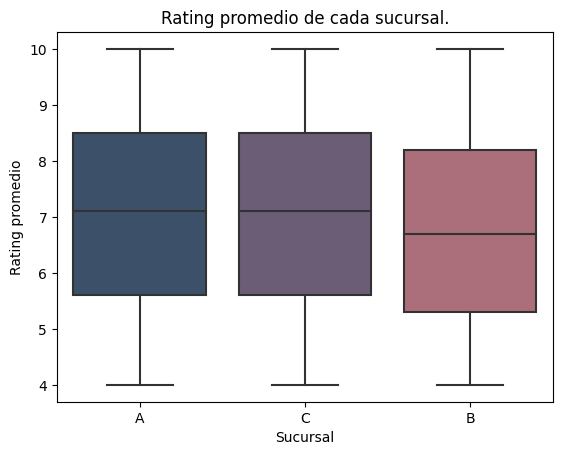

In [52]:
promedio_rating = df.groupby('Sucursal')['Rating'].mean().reset_index()
fig, ax = plt.subplots()
sns.boxplot(x = 'Sucursal', y = 'Rating', data = df, ax = ax, palette = ['#355070', '#6d597a', '#b56576', '#e56b6f', '#eaac8b'])

plt.title('Rating promedio de cada sucursal.')
plt.xlabel('Sucursal')
plt.ylabel('Rating promedio')
plt.show()

Las sucursales **'A'** y **'C'** tienen un promedio de Rating un poco mayor a 7.0 indicando una puntuación positiva de los clientes en ambas sucursales. La sucursal **'B'** no alcanza esta puntuación por muy poco, pero hay que resaltar que de todos modos se encuentra en una puntuación positiva. Esto nos dice que las 3 sucursales tienen una buena evaluación con los puntajes de nuestros clientes.

### Formas de pago más usadas.

Queremos saber las formas en las que pagan nuestros clientes y cuales son las más usadas.

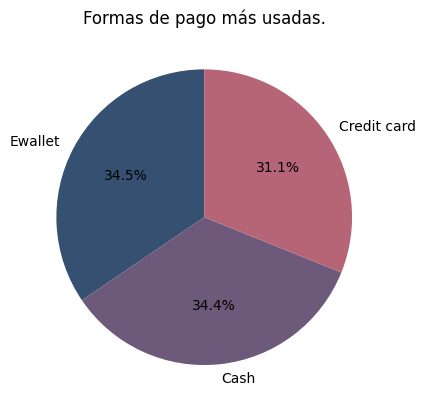

In [14]:
pagos = df['Pago'].value_counts()

porcentaje = (pagos / pagos.sum()) * 100

plt.pie(porcentaje, labels = porcentaje.index, autopct = '%1.1f%%', startangle = 90, colors = paleta)
plt.title('Formas de pago más usadas.')
plt.show()

Sabemos que el dinero digital es mucho más cómodo y se adaptó muy bien en el mundo los últimos años y así sigue al día de hoy. La forma más utilizada son las billeteras virtuales ganando por un punto porcentual al dinero en efectivo. Hay que recordar que estos datos son del año 2019, hoy en día la diferencia puede ser un poco más significativa. En cuanto las tarjetas de crédito es entendible que sea la que menos uso tenga debido a que la mayoría de las personas no posee una tarjeta de crédito.

### Ingresos brutos diarios.

El objetivo principal de la mayoría de negocios es generar dinero, por eso vamos a abarcar rápidamente la percepción de las ganancias de las 3 sucursales durante los 3 meses.

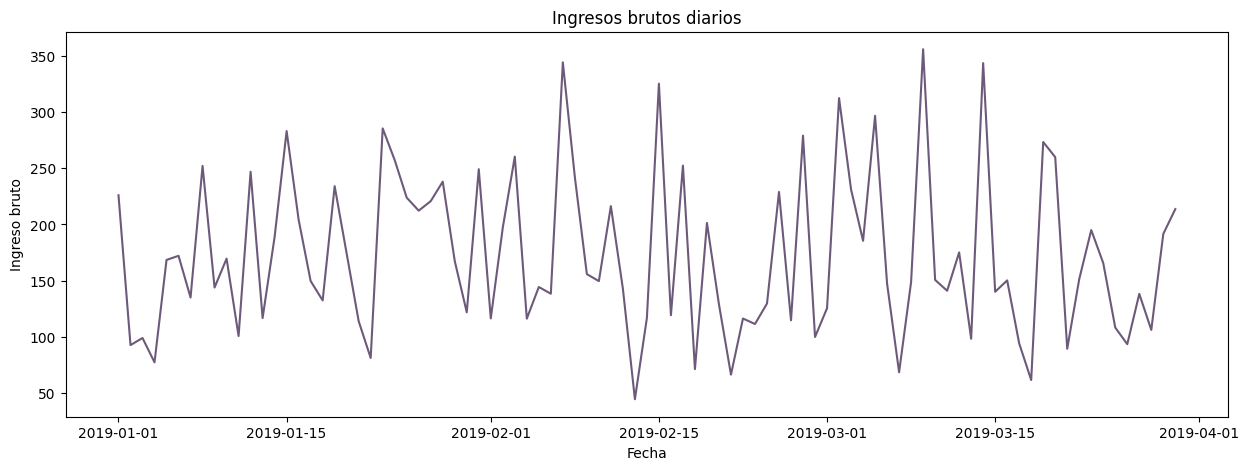

In [15]:
# Convertimos la columna fecha en un datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Agrupamos los ingresos.
ventas = df.groupby(df['Fecha'].dt.date)['Ingreso bruto'].sum().reset_index()

plt.figure(figsize = (15, 5))
sns.lineplot(x = 'Fecha', y = 'Ingreso bruto', data = ventas, color = paleta[1])
#plt.xticks(rotation = 45)
plt.title('Ingresos brutos diarios')
plt.xlabel('Fecha')
plt.ylabel('Ingreso bruto')
plt.show()

Este gráfico nos muestra los ingresos brutos que se obtuvieron durante los 3 meses pero, para analizarlo mejor, vamos a hacer un gráfico por mes.

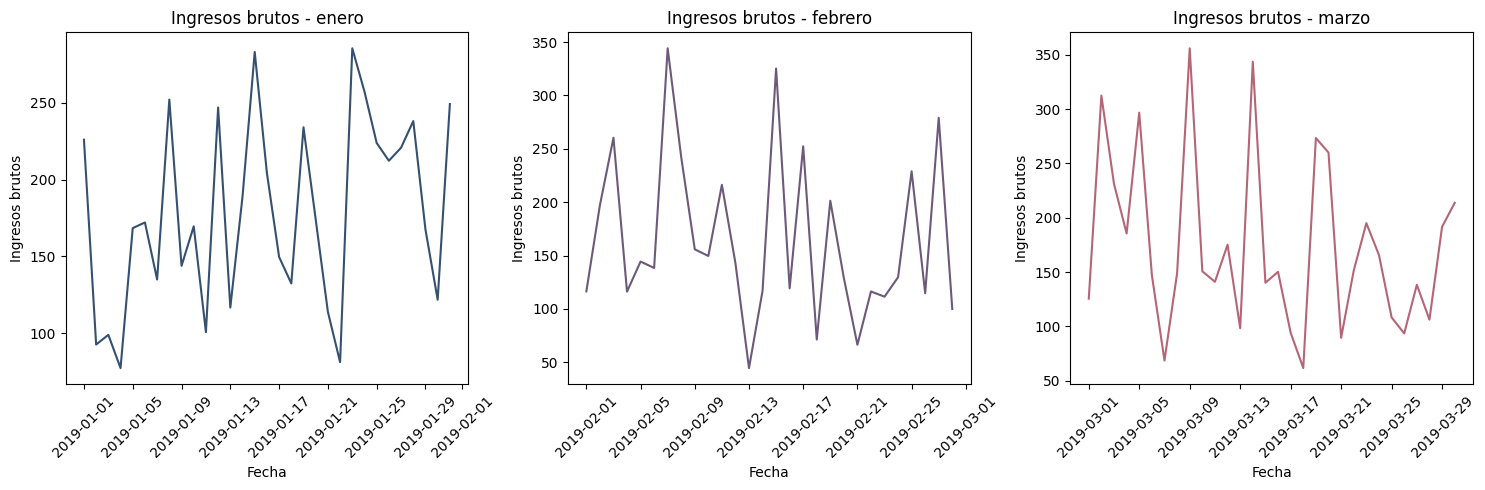

In [16]:
df['Mes'] = df['Fecha'].dt.month # Creamos la columna 'Mes' para separar los meses.

ordenados = sorted(df['Mes'].unique()) # Ordenamos los meses.
nombres = [calendar.month_name[mes] for mes in ordenados] # Le agregamos los nombres a los meses.

plt.figure(figsize = (15, 5))

# Creamos un gráfico para cada mes.
for i, (month, nombres) in enumerate(zip(ordenados, nombres), start = 1):
    plt.subplot(1, 3, i)
    # Como en el gráfico anterior, agrupamos los ingresos.
    ingresos = df[df['Mes'] == month].groupby(df['Fecha'].dt.date)['Ingreso bruto'].sum().reset_index()

    sns.lineplot(x = 'Fecha', y = 'Ingreso bruto', data = ingresos, color = paleta[i - 1])
    plt.xticks(rotation = 45)
    plt.title(f'Ingresos brutos - {nombres}')
    plt.xlabel('Fecha')
    plt.ylabel('Ingresos brutos')

plt.tight_layout()
plt.show()

Vemos que las 3 sucursales tuvieron picos altos y bajos durante los 3 meses. Enero tiene los ingresos brutos más bajos, tal vez porque a finales de diciembre se tiende a comprar demasiados insumos por ser fin de año y estar presentes los días festivos. Marzo posee el pico de ganancia más alto y febrero el más bajo.

### Tipo de clientes según su género.

Queremos conocer a nuestros clientes y qué relación tienen con nuestras sucursales, por eso vamos a hacer un conteo de hombres y mujeres para ver la cantidades de miembros que tenemos en ambos sexos registrados en el dataset.

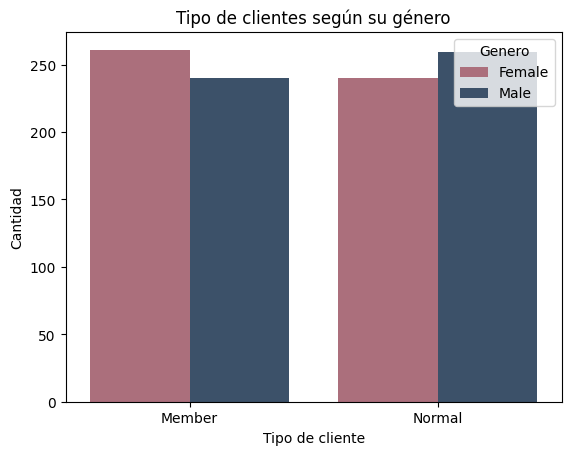

In [17]:
paleta_grafico = {'Male': '#355070', 'Female' : '#b56576'}

sns.countplot(x = 'Tipo de cliente', hue = 'Genero', data = df, palette = paleta_grafico)
plt.title('Tipo de clientes según su género')
plt.xlabel('Tipo de cliente')
plt.ylabel('Cantidad')

plt.show()

Vemos que las mujeres tienen más membresía en nuestra empresa que los hombres, aunque la diferencia es poca dando la siguiente distribución de membresía:  

Mujeres: 260  
Hombres: 240  

Aproximadamente.

### Relación entre producto y género del cliente.

¿Qué producto llevan nuestros clientes?  

Normalmente una empresa o emprendimiento destina siempre una línea de productos que haga hincapié a la oferta y demanda. Veamos la distribución entre nuestros clientes en relación a nuestros productos.

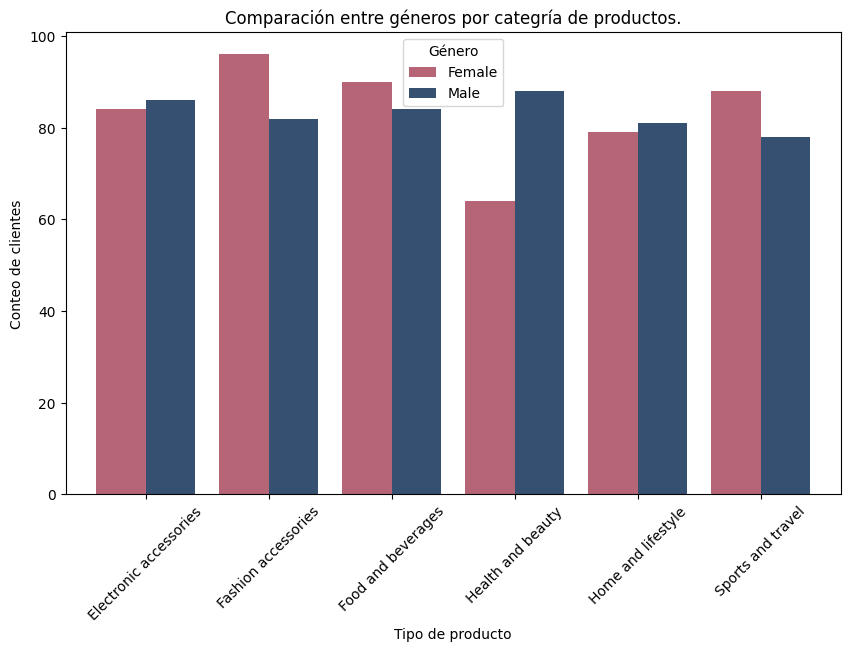

In [37]:
tabla = pd.crosstab(df['Linea de productos'], df['Genero'])
grafico = tabla.plot(kind = 'bar', color = paleta_grafico, figsize = (10, 6), width = 0.8)

plt.title('Comparación entre géneros por categría de productos.')
plt.xlabel('Tipo de producto')
plt.xticks(rotation = 45)
plt.ylabel('Conteo de clientes')
plt.legend(title = 'Género')
plt.show()

Las líneas de productos "Accesorios electrónicos" y "Hogar y Estilo de vida" están bastante igualadas y es entendible debido a que en accesorios electrónicos puede tener una variedad de productos como cargadores de celulares, auriculares, parlantes, accesorios de computadoras, etc. Lo mismo ocurre con los productos de hogar y estilo de vida que pueden contener productos de limpieza, muebles, accesorios de habitaciones. Esto hace que ambas lineas sean muy solicitadas por todos los clientes.  

El sexo masculino tuvo una compra significativamente mayor a la del sexo femenino en "Salud y Belleza" y, no tan significativamente, el sexo femenino tiene una mayor compra en las líneas restantes: "Accesorios de moda", "Alimentos y Bebidas", "Deportes y Viajes".

### Cierre de proyecto.

En este proyecto, hicimos un estudio de los datos y de su distribución. También vimos las ganancias brutas históricas durante los 3 meses, la sucursal que más ingresos brutos tuvo, la distribución entre los clientes con relación a línea de productos y membresía, las formas de pagos más usadas, el rating promedio de cada sucursal y la correlación entre las variables numéricas.

### Finalidad del proyecto.

Este proyecto está creado con fines de trabajar las herramientas que ya conozco y subirlo a mi portafolio. Aunque sé que hay más posibilidades de gráficos, tengo otros proyectos en mente para realizar y veo que este proyecto abarca muchas cosas importantes como para darlo por completo.


### Rodrigo Alegre - Científico de datos | Analista de datos.
[LinkedIn](https://www.linkedin.com/in/rodrigoalegre1/)